# Import Packages

In [1]:
import os
import glob
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Import Raw Data

## Raw Data Fuel

In [2]:
fuel_raw = pd.read_excel('../data/processed/all_completed.xlsx')

fuel_raw.sample(10)

,code_unit,EGI,tipe,date,hour,SLOC,amount,Hm,Consumption,HM
1400,EX42,EGI 37,day,2022-11-24,12:07:00,CN403,877.0,29132.0,188.285714,7.0
85,EX41,EGI 37,night,2022-02-11,00:01:00,CN469,526.0,23322.0,67.000000,5.0
1840,EX43,EGI 87,night,2022-06-28,00:13:00,CN403,1000.0,24678.0,103.600000,10.0
1650,EX43,EGI 87,night,2022-03-27,00:27:00,CN404,564.0,23037.0,171.166667,6.0
1149,EX42,EGI 37,night,2022-07-23,00:10:00,CN403,1222.0,26959.0,92.833333,12.0
2766,EX44,EGI 87,night,2022-09-30,NaN,NaN,NaN,NaN,NaN,NaN
1756,EX43,EGI 87,night,2022-05-17,00:05:00,CN403,917.0,23925.0,101.000000,10.0
2019,EX43,EGI 87,night,2022-09-25,23:55:00,CN403,688.0,26195.0,99.750000,8.0
250,EX41,EGI 37,night,2022-05-04,23:45:00,CN404,647.0,24567.0,162.000000,7.0
544,EX41,EGI 37,night,2022-09-27,23:57:00,CN404,1172.0,27218.0,106.200000,10.0


In [3]:
fuel_interim = fuel_raw.groupby(['code_unit',
                                 'date']).agg({'amount':np.sum,
                                               'HM':np.sum,
                                               'Consumption':np.mean}).reset_index().copy()

In [4]:
fuel_interim.sample(10)

,code_unit,date,amount,HM,Consumption
556,EX42,2022-07-11,2271.0,3.0,448.666667
501,EX42,2022-05-17,1818.0,18.0,133.415584
45,EX41,2022-02-15,1102.0,18.0,76.441558
1153,EX44,2022-02-28,1926.0,21.0,70.700000
1086,EX43,2022-12-23,1920.0,18.0,107.912500
107,EX41,2022-04-18,0.0,0.0,NaN
941,EX43,2022-07-31,1304.0,14.0,171.800000
1311,EX44,2022-08-05,2055.0,19.0,95.344444
1052,EX43,2022-11-19,1555.0,16.0,117.812500
1072,EX43,2022-12-09,1807.0,19.0,113.477273


## Raw Data Production

In [5]:
production = pd.read_excel('../data/processed/Produksi EX41 dan EX43.ods')

production.sample(10)

,date,Eq. Numb,EGI,HM,Production OB
408,2022-09-07,EX41,Excavator,19.0,8118.0
104,2022-02-23,EX41,Excavator,20.0,9886.0
410,2022-09-08,EX41,Excavator,20.0,7832.0
18,2022-01-11,EX41,Excavator,21.0,11520.0
677,2023-01-27,EX43,Excavator,20.0,8382.0
67,2022-02-04,EX43,Excavator,13.0,7002.0
23,2022-01-13,EX43,Excavator,8.0,3420.0
14,2022-01-09,EX41,Excavator,15.0,6390.0
259,2022-06-21,EX43,Excavator,18.0,7744.0
443,2022-10-02,EX43,Excavator,11.0,4889.0


In [6]:
production_interim = production[['date',
                                 'Eq. Numb',
                                 'HM',
                                 'Production OB']].copy()

In [7]:
production_interim.rename(columns={"Eq. Numb": "code_unit"}, inplace=True)

In [8]:
production_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           718 non-null    datetime64[ns]
 1   code_unit      718 non-null    object        
 2   HM             718 non-null    float64       
 3   Production OB  718 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 22.6+ KB


In [9]:
production_interim.sample(10)

,date,code_unit,HM,Production OB
118,2022-03-02,EX41,0.0,0.0
322,2022-07-26,EX41,14.0,6133.5
405,2022-09-05,EX43,13.0,4221.0
21,2022-01-12,EX43,0.0,0.0
290,2022-07-09,EX41,10.0,5220.0
73,2022-02-07,EX43,21.0,10386.0
540,2022-11-20,EX41,20.0,7590.8
86,2022-02-14,EX41,9.0,3885.0
199,2022-04-11,EX43,21.0,9695.0
166,2022-03-26,EX41,18.0,8624.0


In [10]:
production_interim['date'] = production_interim['date'].astype(str) 

## Raw Data Ritase

In [11]:
ritase_files = glob.glob('../data/processed/ritase_*.xls')

temp = []
for i in ritase_files:
      frame = pd.read_csv(i)
      frame['code_unit'] = i[25:29].upper()
      temp.append(frame)

ritase = pd.concat(temp, axis=0, ignore_index=True)

ritase['OB'] = ritase['ritase'] * 43

ritase

,date,ritase,code_unit,OB
0,2022-01-01,0,EX42,0
1,2022-01-02,135,EX42,5805
2,2022-01-03,149,EX42,6407
3,2022-01-04,159,EX42,6837
4,2022-01-05,135,EX42,5805
...,...,...,...,...
727,2022-12-28,211,EX44,9073
728,2022-12-29,164,EX44,7052
729,2022-12-30,255,EX44,10965
730,2022-12-31,192,EX44,8256


In [12]:
ritase_interim = ritase[['date', 'code_unit', 'OB']].copy()

In [13]:
ritase_interim.rename(columns={"OB": "Production OB"}, inplace=True)

In [14]:
ritase_interim.sample(10)

,date,code_unit,Production OB
653,2022-10-15,EX44,11094
300,2022-10-28,EX42,11653
713,2022-12-14,EX44,9976
183,2022-07-03,EX42,8471
615,2022-09-07,EX44,9632
48,2022-02-18,EX42,5074
559,2022-07-13,EX44,7783
146,2022-05-27,EX42,9632
536,2022-06-20,EX44,9675
599,2022-08-22,EX44,5332


In [15]:
ritase_interim.insert(2, 'HM', np.nan)

ritase_interim.sample(5)

,date,code_unit,HM,Production OB
629,2022-09-21,EX44,NaN,8385
115,2022-04-26,EX42,NaN,9761
565,2022-07-19,EX44,NaN,10062
443,2022-03-19,EX44,NaN,7181
551,2022-07-05,EX44,NaN,8600


In [16]:
ritase_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           732 non-null    object 
 1   code_unit      732 non-null    object 
 2   HM             0 non-null      float64
 3   Production OB  732 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 23.0+ KB


In [17]:
production_final = pd.concat([production_interim, ritase_interim], 
                             axis=0, ignore_index=True)

production_final.sample(5)

,date,code_unit,HM,Production OB
1153,2022-03-11,EX44,NaN,8772.0
1421,2022-12-04,EX44,NaN,0.0
1136,2022-02-22,EX44,NaN,4257.0
767,2022-02-19,EX42,NaN,9847.0
117,2022-03-01,EX43,20.0,9087.0


In [18]:
production_final

,date,code_unit,HM,Production OB
0,2022-01-02,EX41,20.0,10350.0
1,2022-01-02,EX43,21.0,10800.0
2,2022-01-03,EX41,22.0,11565.0
3,2022-01-03,EX43,21.0,9675.0
4,2022-01-04,EX41,14.0,6750.0
...,...,...,...,...
1445,2022-12-28,EX44,NaN,9073.0
1446,2022-12-29,EX44,NaN,7052.0
1447,2022-12-30,EX44,NaN,10965.0
1448,2022-12-31,EX44,NaN,8256.0


In [19]:
production_final['code_unit'].unique()

array(['EX41', 'EX43', 'EX42', 'EX44'], dtype=object)

## Finalize Data

In [20]:
fuel_interim.sample(5)

,code_unit,date,amount,HM,Consumption
1337,EX44,2022-08-31,2051.0,11.0,84.272727
1220,EX44,2022-05-06,1319.0,16.0,111.363636
213,EX41,2022-08-02,2106.0,19.0,120.577778
228,EX41,2022-08-17,0.0,0.0,NaN
1218,EX44,2022-05-04,1568.0,18.0,86.000000


In [21]:
production_interim.sample(5)

,date,code_unit,HM,Production OB
158,2022-03-22,EX41,17.0,8536.0
18,2022-01-11,EX41,21.0,11520.0
298,2022-07-13,EX41,19.0,4590.0
700,2023-02-08,EX41,20.0,9202.0
11,2022-01-07,EX43,20.0,10800.0


In [22]:
df = pd.merge(fuel_interim, production_final, on=["date", "code_unit"],
              how='left')

In [23]:
df.columns = df.columns.str.upper() 

In [24]:
df.sample(5)

,CODE_UNIT,DATE,AMOUNT,HM_X,CONSUMPTION,HM_Y,PRODUCTION OB
1364,EX44,2022-09-27,866.0,0.0,NaN,NaN,10191.0
680,EX42,2022-11-12,1907.0,16.0,139.111111,NaN,7783.0
1450,EX44,2022-12-22,2052.0,21.0,93.527273,NaN,6020.0
708,EX42,2022-12-10,1881.0,15.0,184.886364,NaN,10191.0
1005,EX43,2022-10-03,1633.0,17.0,117.886364,0.0,0.0


In [25]:
df.rename(columns={'HM_X': 'HM_CALC',
                   'HM_Y': 'HM_HRS',
                   'PRODUCTION OB' : "PRODUCTION_OB"}, inplace=True)

df.sample(5)

,CODE_UNIT,DATE,AMOUNT,HM_CALC,CONSUMPTION,HM_HRS,PRODUCTION_OB
1331,EX44,2022-08-25,1202.0,14.0,133.250000,NaN,0.0
566,EX42,2022-07-21,2172.0,19.0,119.655556,NaN,1591.0
1343,EX44,2022-09-06,1949.0,21.0,92.436364,NaN,10019.0
549,EX42,2022-07-04,2481.0,20.0,129.500000,NaN,10320.0
733,EX43,2022-01-04,1424.0,16.0,103.198413,15.0,7740.0


In [26]:
df['CONSUMPTION_CALC'] = df['AMOUNT']/df['HM_CALC']

In [27]:
df['CONSUMPTION_HRS'] = df['AMOUNT']/df['HM_HRS']

In [28]:
df.sample(5)

,CODE_UNIT,DATE,AMOUNT,HM_CALC,CONSUMPTION,HM_HRS,PRODUCTION_OB,CONSUMPTION_CALC,CONSUMPTION_HRS
572,EX42,2022-07-27,2543.0,21.0,114.909091,NaN,9331.0,121.095238,NaN
825,EX43,2022-04-06,1808.0,20.0,87.863636,15.0,6690.0,90.400000,120.533333
622,EX42,2022-09-15,1992.0,13.0,652.625000,NaN,10535.0,153.230769,NaN
904,EX43,2022-06-24,1635.0,18.0,94.112500,17.0,7785.0,90.833333,96.176471
1107,EX44,2022-01-13,1073.0,11.0,97.545455,NaN,5418.0,97.545455,NaN


Amount : Konsumsi bahan bakar dalam liter (L)
Consumption : Konsumsi bahan bakar/jam (L/jam)

<AxesSubplot: ylabel='Frequency'>

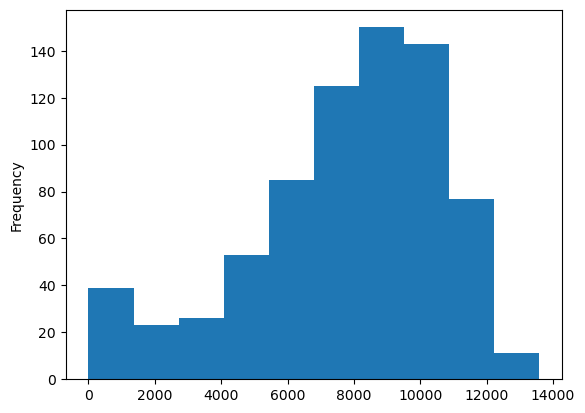

In [29]:
ritase_interim['Production OB'].plot(kind='hist') # OB hasil hitungan ritase

<AxesSubplot: ylabel='Frequency'>

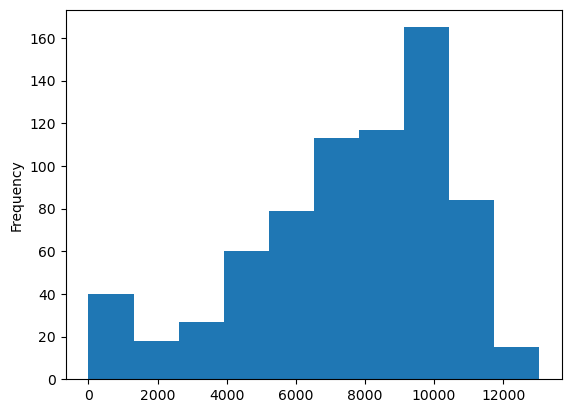

In [30]:
production_interim['Production OB'].plot(kind="hist")

# Modeling

In [46]:
df_modeling = df[['CODE_UNIT', 'AMOUNT', 'PRODUCTION_OB']].copy()

In [47]:
df_modeling.dropna(inplace=True)

In [48]:
df_modeling = df_modeling[df_modeling['CODE_UNIT'].isin(['EX41', 'EX43'])].copy()

In [49]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 1 to 1094
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CODE_UNIT      624 non-null    object 
 1   AMOUNT         624 non-null    float64
 2   PRODUCTION_OB  624 non-null    float64
dtypes: float64(2), object(1)
memory usage: 19.5+ KB


In [50]:
df_modeling.replace([np.inf, -np.inf], np.nan, inplace=True)

In [51]:
df_modeling.dropna(inplace=True)

In [52]:
df_modeling['CODE_UNIT'].value_counts()

EX41    312
EX43    312
Name: CODE_UNIT, dtype: int64

In [53]:
df_modeling.corr(numeric_only=True)

,AMOUNT,PRODUCTION_OB
AMOUNT,1.000000,0.038865
PRODUCTION_OB,0.038865,1.000000


In [54]:
X = df_modeling.drop('AMOUNT', axis=1)
y = df_modeling['AMOUNT']

In [55]:
X = pd.get_dummies(X)

## Split Data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train

,PRODUCTION_OB,CODE_UNIT_EX41,CODE_UNIT_EX43
815,9936.0,0,1
748,9224.0,0,1
7,11115.0,1,0
105,6903.0,1,0
156,8052.0,1,0
...,...,...,...
72,7781.0,1,0
107,3960.0,1,0
323,7590.8,1,0
895,8932.0,0,1


## Preprocessing

In [58]:
scaler = StandardScaler()

In [59]:
numeric_feature = ['PRODUCTION_OB']
categoric_feature = ['CODE_UNIT_EX41', 'CODE_UNIT_EX43']

scaler.fit(X_train[numeric_feature])

StandardScaler()

In [60]:
X_train_scaled = scaler.transform(X_train[numeric_feature])
X_test_scaled = scaler.transform(X_test[numeric_feature])

In [61]:
X_train_final = pd.concat([X_train[categoric_feature],
                           pd.DataFrame(X_train_scaled, index=X_train.index, columns=numeric_feature)], axis=1)

X_test_final = pd.concat([X_test[categoric_feature],
                           pd.DataFrame(X_test_scaled, index=X_test.index, columns=numeric_feature)], axis=1)

In [62]:
model = LinearRegression(n_jobs=-1)

In [73]:
y_train

815    1420.0
748    1664.0
7      1808.0
105    1474.0
156    1461.0
        ...  
72     2157.0
107       0.0
323    1133.0
895    2013.0
103    2137.0
Name: AMOUNT, Length: 499, dtype: float64

In [74]:
import statsmodels.api as sm
mod = sm.OLS(y_train, X_train_final)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AMOUNT   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.621
Date:                Sun, 12 Feb 2023   Prob (F-statistic):             0.0275
Time:                        14:30:01   Log-Likelihood:                -3858.8
No. Observations:                 499   AIC:                             7724.
Df Residuals:                     496   BIC:                             7736.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
CODE_UNIT_EX41  1682.6524     35.709     47.

## Train Model

In [64]:
model.fit(X_train_final,y_train)

LinearRegression(n_jobs=-1)

In [65]:
y_train_predict = model.predict(X_train_final)
y_test_predict = model.predict(X_test_final)

In [66]:
model.coef_

array([ 61.08442405, -61.08442405,  30.29594551])

In [67]:
model.intercept_

1621.5680064304113

## Evaluation

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import f

In [69]:
train_rmse = mean_squared_error(y_train, y_train_predict, squared=False)
test_rmse = mean_squared_error(y_test, y_test_predict, squared=False)
train_mae = mean_absolute_error(y_train, y_train_predict)
test_mae = mean_absolute_error(y_test, y_test_predict)
train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)

print("Linear Regression")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R2", train_r2)
print("Test R2", test_r2)

Linear Regression
Train RMSE: 552.3079514588804
Test RMSE: 557.1656311135862
Train MAE: 437.8311382095395
Test MAE: 448.55624160057744
Train R2 0.014390213841331323
Test R2 -0.014074599064602067


# Export Dataset

In [55]:
df.to_csv("../data/processed/datamart_final.csv", index=False)